# Housing Prices Prediction

![alt text](https://i.pinimg.com/originals/b0/87/f6/b087f63e81d905112fc646d21a9f326c.png)

## Preliminary Information

__Problem Statement:__ Given a dataset regarding houses in Ames, Iowa, use machine learning & data science techniques to predict prices for given houses

__About the Data:__
* There are 79 features in total
* Training set has 1460 examples & evaluation set has 1,458 examples
* Data is presented in a CSV format and is small enough to be locally downloaded. 

__Framing the Problem:__
* This problem is a SUPERVISED learning problem.
* Specifically, this problem is a REGRESSION problem. 
* Evaluation metric will be ROOT MEAN SQUARE ERROR (RSME).
* Data is small and stagnent so online learning systems are not needed. 
* No requirement on whether model has to be instance-based or model-based.
* Project will be used for learning purposes.

__How to solve without Machine Learning:__ You would probably utilize features such as the neighborhood and quality of the house as indicators on how the house should be priced. 

## Getting the Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting the Data
FILENAME = '/Users/jinalshah/Jinal/Github Repos/House-Prices-Challenge-Solution/Data/'
train_data = pd.read_csv(FILENAME+'train.csv')
test_data = pd.read_csv(FILENAME+'test.csv')
submission_data = pd.read_csv(FILENAME+'sample_submission.csv')

In [3]:
# Making sure the data was stored nicely
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
submission_data

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


__Just a couple of Notes:__
* The target variable is "SalePrice".
* Submissons must include HouseId as well as predicted SalePrice.

## Exploratory Data Analysis (EDA)

In [6]:
# Creating a copy of the training set to experiment with
train_copy = train_data.copy()
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Dealing with Missing Values

In [7]:
# Creating a function that stores the percentage of missing values in each feature
def missing(data):
    missing_dict = {}
    
    for i in data.keys():
        missing_dict[i] = (data[i].isnull().sum()/data.shape[0]) * 100
    
    return missing_dict

In [8]:
missing_vals = missing(train_copy)
missing_vals

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 17.73972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 93.76712328767123,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 '1stFlrSF': 0.0,
 '2

In [9]:
# Getting a list of features whose # of missing vals is above 80
def missing_vals_over_80(missing_vals):
    result = []
    for i in missing_vals.keys():
        if missing_vals[i] >= 80:
            result.append(i)
    
    return result

In [10]:
missing_over_80 = missing_vals_over_80(missing_vals)
missing_over_80

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

#### Fireplace Quality (FireplaceQu)

In [11]:
# FireplaceQu has quite a few missing values so I want to see if I should remove it
train_copy['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

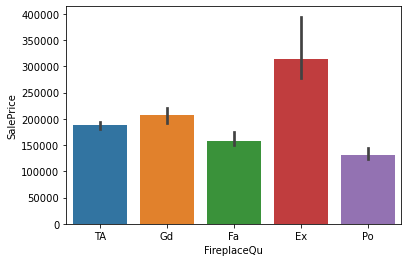

In [12]:
# Plotting FireplaceQu against SalePrice
sns.barplot(x='FireplaceQu',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

From the above plot, it is easy to identify that Fireplace Quality does play a big role in the Sale Price of a house. Houses with excellent Fireplaces generally sell for much higher prices, even though there are few houses with excellent quality Fireplaces.  
  
Instead of deleting FireplaceQu, I will replace the missing values with a 'NF' label, which represents that the house doesn't have a Fireplace.

In [13]:
def replace_missing(data,feature,replacement):
    temp = data[feature].fillna(replacement)
    return temp

In [14]:
train_copy['FireplaceQu'] = replace_missing(train_copy,'FireplaceQu','NF')
train_copy['FireplaceQu'].isnull().sum()

0

In [15]:
# Removing the features who have over 80% missing values
train_copy = train_copy.drop(missing_over_80,axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [16]:
# Taking a look at the updated missing values dictionary
missing_vals = missing(train_copy)
missing_vals

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotFrontage': 17.73972602739726,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': 2.6027397260273974,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 'Electrical': 0.0684931506849315,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF

In [17]:
# Creating a function that returns a dict with only the missing features
def only_missing(missing):
    only_missing = {}
    for i in missing.keys():
        if missing[i] > 0:
            only_missing[i] = missing[i]
    return only_missing

In [18]:
missing_vals = only_missing(missing_vals)
missing_vals

{'LotFrontage': 17.73972602739726,
 'MasVnrType': 0.547945205479452,
 'MasVnrArea': 0.547945205479452,
 'BsmtQual': 2.5342465753424657,
 'BsmtCond': 2.5342465753424657,
 'BsmtExposure': 2.6027397260273974,
 'BsmtFinType1': 2.5342465753424657,
 'BsmtFinType2': 2.6027397260273974,
 'Electrical': 0.0684931506849315,
 'GarageType': 5.5479452054794525,
 'GarageYrBlt': 5.5479452054794525,
 'GarageFinish': 5.5479452054794525,
 'GarageQual': 5.5479452054794525,
 'GarageCond': 5.5479452054794525}

In [19]:
train_copy[missing_vals.keys()].dtypes

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object

In [20]:
# Separating the floats from the objects
missing_floats = []
missing_obj = []

for i in missing_vals.keys():
    if train_copy[i].dtype == np.float64:
        missing_floats.append(i)
    else:
        missing_obj.append(i)

In [21]:
# Checking if the features were separated properly
missing_floats, missing_obj

(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 ['MasVnrType',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond'])

#### Experimenting with the float features with missing values

In [22]:
# Checking to see if GarageYrBlt is truly numerical
train_copy['GarageYrBlt'].value_counts().sort_values(ascending=False)

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

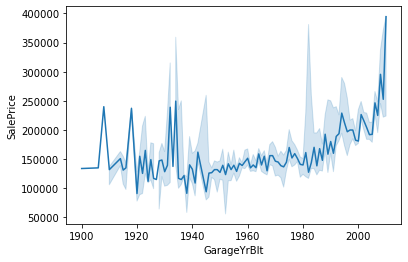

In [23]:
# Checking to see if the year the garage was built has any impact on sale price
sns.lineplot(x='GarageYrBlt',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

Note: The year the garage was built ranges from 1900 to 2010.  
  
Note: GarageYrBlt is categorical, not numerical.

##### Experimenting with combining garage years and storing them as decades

In [24]:
int((train_copy['GarageYrBlt'][0]) / 10) * 10

2000

In [25]:
train_copy['GarageYrBltDec'] = train_copy['GarageYrBlt']
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2003.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1976.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2001.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1998.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1999.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1978.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,1941.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1950.0


In [26]:
# Changing all the values in GarageYrBlt to decades
for i in range(train_copy.shape[0]):
    try:
         train_copy['GarageYrBltDec'][i] = int((train_copy['GarageYrBlt'][i]) / 10) * 10
    except:
        train_copy['GarageYrBltDec'][i] = np.nan

train_copy

<ipython-input-26-474f6c65b00a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['GarageYrBltDec'][i] = int((train_copy['GarageYrBlt'][i]) / 10) * 10
<ipython-input-26-474f6c65b00a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['GarageYrBltDec'][i] = np.nan


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2000.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1970.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2000.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1990.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1990.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1970.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,1940.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1950.0


In [27]:
# Checking to see if my function worked
train_copy['GarageYrBltDec'].value_counts()

2000.0    399
1990.0    196
1970.0    186
1960.0    185
1950.0    151
1980.0     95
1940.0     55
1920.0     51
1930.0     41
1910.0     14
1900.0      3
2010.0      3
Name: GarageYrBltDec, dtype: int64

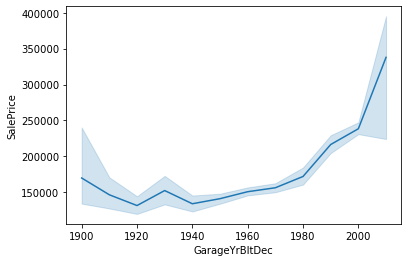

In [28]:
# Plotting a line chart using the decades
sns.lineplot(x='GarageYrBltDec',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [29]:
# Checking the correlation between garageyrblt, garageyrbltdec, and saleprice
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
GarageYrBlt       0.486362
GarageYrBltDec    0.479519
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.351799
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
E

Sorting the Years the Garage was built into decades is a very good approach. Since GarageYrBlt needs to be encoded because its a categorical feature, I reduced the number of categories from 97 to 12. Furthermore, I barely lost any correlation and got a much clearer relationship.  
  
With that being said, I am going to remove GarageYrBlt and replace it with GarageYrBltDec. Furthermore, I will replace the missing values with 0s, which indicates that there is no garage.

In [30]:
train_copy = train_copy.drop('GarageYrBlt',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2000.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,1970.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2000.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,1990.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,1990.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,1970.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,1940.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,1950.0


In [31]:
train_copy['GarageYrBltDec'] = replace_missing(train_copy, 'GarageYrBltDec','N/A')
train_copy['GarageYrBltDec'].isnull().sum()

0

##### Playing with LotFrontage and MasVnrArea

In [32]:
# Taking a look at the values in Lot Frontage
dict(train_copy['LotFrontage'].value_counts(ascending=False))

{60.0: 143,
 70.0: 70,
 80.0: 69,
 50.0: 57,
 75.0: 53,
 65.0: 44,
 85.0: 40,
 78.0: 25,
 90.0: 23,
 21.0: 23,
 64.0: 19,
 68.0: 19,
 24.0: 19,
 73.0: 18,
 79.0: 17,
 55.0: 17,
 72.0: 17,
 63.0: 17,
 100.0: 16,
 74.0: 15,
 66.0: 15,
 51.0: 15,
 52.0: 14,
 59.0: 13,
 82.0: 12,
 43.0: 12,
 40.0: 12,
 71.0: 12,
 67.0: 12,
 57.0: 12,
 76.0: 11,
 69.0: 11,
 92.0: 10,
 53.0: 10,
 88.0: 10,
 34.0: 10,
 86.0: 10,
 84.0: 9,
 77.0: 9,
 35.0: 9,
 44.0: 9,
 62.0: 9,
 61.0: 8,
 98.0: 8,
 96.0: 8,
 93.0: 8,
 58.0: 7,
 120.0: 7,
 95.0: 7,
 107.0: 7,
 91.0: 6,
 110.0: 6,
 41.0: 6,
 81.0: 6,
 89.0: 6,
 30.0: 6,
 105.0: 6,
 36.0: 6,
 94.0: 6,
 54.0: 6,
 48.0: 6,
 87.0: 5,
 56.0: 5,
 83.0: 5,
 37.0: 5,
 32.0: 5,
 47.0: 5,
 102.0: 4,
 42.0: 4,
 49.0: 4,
 103.0: 3,
 104.0: 3,
 130.0: 3,
 99.0: 3,
 108.0: 3,
 45.0: 3,
 97.0: 2,
 129.0: 2,
 115.0: 2,
 313.0: 2,
 109.0: 2,
 174.0: 2,
 114.0: 2,
 101.0: 2,
 121.0: 2,
 124.0: 2,
 116.0: 2,
 134.0: 2,
 122.0: 2,
 118.0: 2,
 106.0: 1,
 46.0: 1,
 150.0: 1,
 137.0:

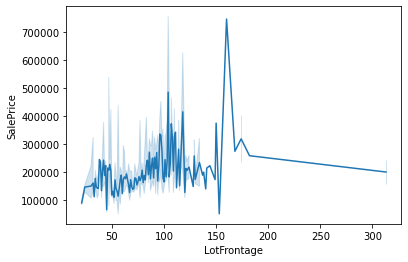

In [33]:
# Line Graph representing relationship between LotFrontage + Sale Price
sns.lineplot(x='LotFrontage',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

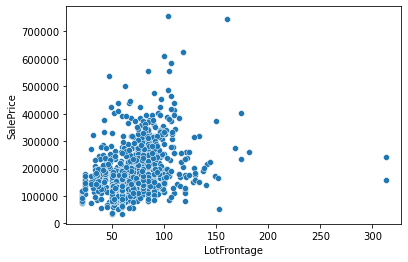

In [34]:
# Scatter Plot for relationship between LotFrontage + Sale Price
sns.scatterplot(x='LotFrontage',y='SalePrice',data=train_copy)
plt.show()

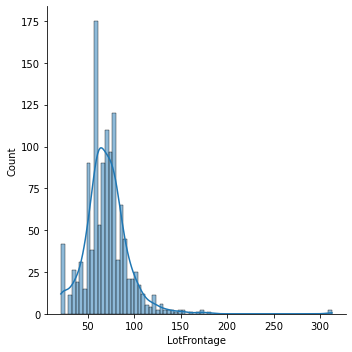

In [35]:
# Taking a look at the distribution of LotFrontage
sns.displot(x='LotFrontage',data=train_copy,kde=True)
plt.show()

In [36]:
# Checking if LotFrontage has a strong correlation with SalePrice
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [37]:
# Lot Frontage is correlated so we need to keep it. I will replace the missing values with the median
train_copy['LotFrontage'] = replace_missing(train_copy,'LotFrontage',np.nanmedian(train_copy['LotFrontage']))
train_copy['LotFrontage'].isnull().sum()

0

In [38]:
# Since the distribution for Lot Frontage is right skewed, I will log it to make it normally distributed
train_copy['LogLotFrontage'] = np.log(train_copy['LotFrontage'])
train_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2008,WD,Normal,208500,2000.0,4.174387
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,5,2007,WD,Normal,181500,1970.0,4.382027
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,9,2008,WD,Normal,223500,2000.0,4.219508
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,12,2008,WD,Normal,250000,2000.0,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,2007,WD,Normal,175000,1990.0,4.127134
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2010,WD,Normal,210000,1970.0,4.442651
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,142125,1950.0,4.219508


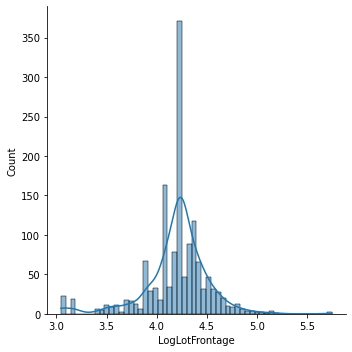

In [39]:
# Checking the new distribution of log Lot Frontage
sns.displot(x='LogLotFrontage',data=train_copy,kde=True)
plt.show()

In [40]:
# Checking to make sure we didn't lose much correlation
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LotFrontage       0.334771
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
K

Just to summarize what I did, I found that LotFrontage does have a positive,moderate correlation with SalePrice so I can't just remove it. I replaced the missing values for LotFrontage with the median because the feature is right skewed. Finally, I performed a log transformation to get the feature into a normal distribution.  
  
Note: I will remove the original Lot Frontage feature so that it can be replaced by the LogLotFrontage feature.

In [41]:
# Removing the original Lot Frontage feature
train_copy = train_copy.drop('LotFrontage',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,2000.0,4.174387
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,1970.0,4.382027
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,2000.0,4.219508
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,2000.0,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,1990.0,4.127134
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,1970.0,4.442651
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,1950.0,4.219508


In [42]:
# Taking a look at the values in MasVnrArea
dict(train_copy['MasVnrArea'].value_counts(ascending=False))

{0.0: 861,
 108.0: 8,
 72.0: 8,
 180.0: 8,
 16.0: 7,
 120.0: 7,
 340.0: 6,
 106.0: 6,
 200.0: 6,
 80.0: 6,
 84.0: 5,
 360.0: 5,
 132.0: 5,
 170.0: 5,
 320.0: 5,
 270.0: 4,
 336.0: 4,
 216.0: 4,
 252.0: 4,
 268.0: 4,
 183.0: 4,
 100.0: 4,
 196.0: 4,
 220.0: 4,
 40.0: 4,
 456.0: 4,
 76.0: 4,
 300.0: 4,
 210.0: 4,
 246.0: 4,
 288.0: 4,
 168.0: 4,
 160.0: 4,
 178.0: 4,
 50.0: 3,
 350.0: 3,
 240.0: 3,
 226.0: 3,
 42.0: 3,
 420.0: 3,
 90.0: 3,
 169.0: 3,
 272.0: 3,
 136.0: 3,
 116.0: 3,
 166.0: 3,
 99.0: 3,
 110.0: 3,
 176.0: 3,
 130.0: 3,
 312.0: 3,
 186.0: 3,
 148.0: 3,
 174.0: 3,
 128.0: 3,
 104.0: 3,
 82.0: 3,
 208.0: 3,
 70.0: 3,
 44.0: 3,
 256.0: 3,
 85.0: 3,
 74.0: 3,
 145.0: 3,
 105.0: 2,
 335.0: 2,
 285.0: 2,
 192.0: 2,
 284.0: 2,
 98.0: 2,
 182.0: 2,
 68.0: 2,
 338.0: 2,
 243.0: 2,
 289.0: 2,
 236.0: 2,
 112.0: 2,
 75.0: 2,
 95.0: 2,
 172.0: 2,
 238.0: 2,
 147.0: 2,
 140.0: 2,
 153.0: 2,
 206.0: 2,
 260.0: 2,
 60.0: 2,
 164.0: 2,
 171.0: 2,
 442.0: 2,
 266.0: 2,
 30.0: 2,
 144.0: 2

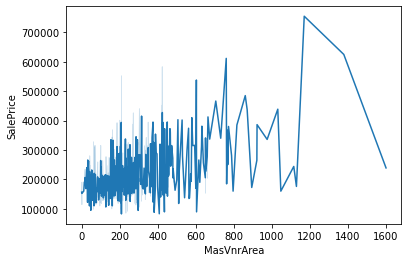

In [43]:
# Plot a line chart to see relationship between MasVnrArea & SalePrice
sns.lineplot(x='MasVnrArea',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

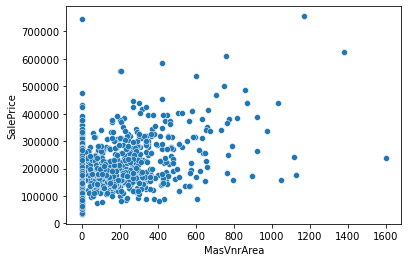

In [44]:
# Plot a scatter plot to see relationship between MasVnrArea & SalePrice
sns.scatterplot(x='MasVnrArea',y='SalePrice',data=train_copy)
plt.show()

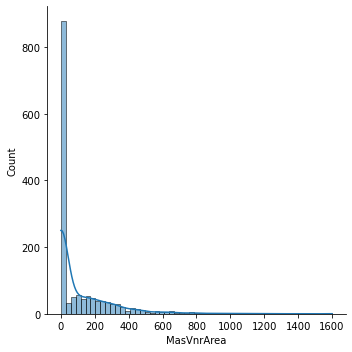

In [45]:
# Taking a look at the distribution of MasVnrArea
sns.displot(x='MasVnrArea',data=train_copy,kde=True)
plt.show()

In [46]:
# Taking a look at the correlation
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.477493
Fireplaces        0.466929
BsmtFinSF1        0.386420
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
N

In [47]:
# Replace the missing values in MasVnrArea with the median
train_copy['MasVnrArea'] = replace_missing(train_copy,'MasVnrArea',np.nanmedian(train_copy['MasVnrArea']))
train_copy['MasVnrArea'].isnull().sum()

0

In [48]:
# Looking at the correlations after replacing the missing values
train_copy.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101
MasVnrArea        0.472614
Fireplaces        0.466929
BsmtFinSF1        0.386420
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
HalfBath          0.284108
LotArea           0.263843
BsmtFullBath      0.227122
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
ScreenPorch       0.111447
PoolArea          0.092404
MoSold            0.046432
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
BsmtHalfBath     -0.016844
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
EnclosedPorch    -0.128578
KitchenAbvGr     -0.135907
N

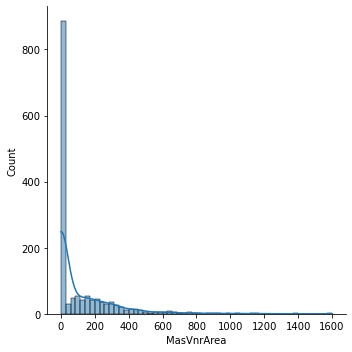

In [49]:
# Looking at the distribution after fixing the missing values
sns.displot(x='MasVnrArea',data=train_copy,kde=True)
plt.show()

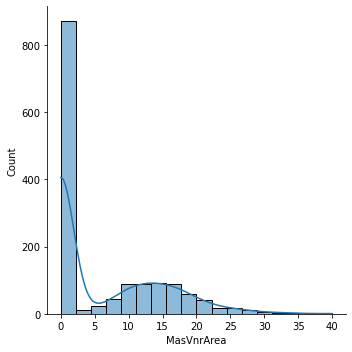

In [50]:
# Testing transformations on MasVnrArea
temp = train_copy['MasVnrArea'] ** .5
sns.displot(temp,kde=True)
plt.show()

In [51]:
# Applying Sqrt Function
train_copy['SqrtMasVnrArea'] = train_copy['MasVnrArea'] ** .5
train_copy = train_copy.drop('MasVnrArea',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000.0,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970.0,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000.0,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000.0,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990.0,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970.0,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950.0,4.219508,0.000000


Explanations for above:
* I found that MasVnrArea is important as it has a positive, moderate correlation with Sale Price. Therefore, I must keep it.
* I replaced the missing values in MasVnrArea with the median because the feature is heavily skewed.
* In order to transform MasVnrArea into a normal distribution, I applied a sqrt transformation.
* It is important to note that this data has a "floor". In other words, there is cap on low this feature's values can be. In this case the floor is 0, which is fine because we can't have negative MasVnrArea anyway. 
* I replaced the original feature with the sqrt feature to have a more distribution of values.

#### Working with the object features with missing values

In [52]:
# Printing out missing_obj
missing_obj

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

##### Dealing with all the Basement related features

In [53]:
# Exploring BsmtQual
train_copy['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

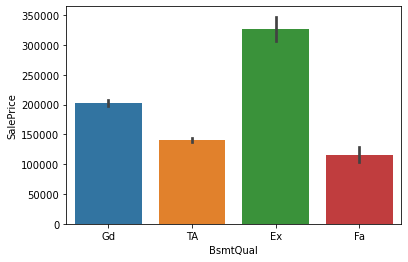

In [54]:
# Plotting the relationship between BsmtQual & SalePrice
sns.barplot(x='BsmtQual',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [55]:
# Since BsmtQual plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtQual'] = replace_missing(train_copy,'BsmtQual','N/A')
train_copy['BsmtQual'].isnull().sum()

0

In [56]:
# Looking at the BsmtCond feature
train_copy['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

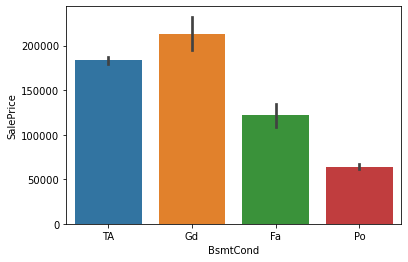

In [57]:
# Plotting the relationship between BsmtCond & SalePrice
sns.barplot(x='BsmtCond',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [58]:
# Since BsmtCond plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtCond'] = replace_missing(train_copy,'BsmtCond','N/A')
train_copy['BsmtCond'].isnull().sum()

0

In [59]:
# Exploring BsmtExposure
train_copy['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

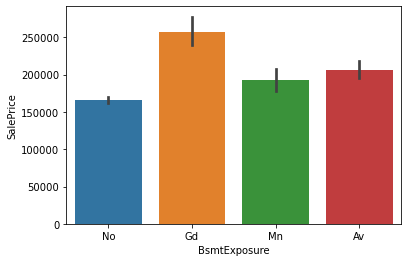

In [60]:
# Plotting the relationship between BsmtExposure & SalePrice
sns.barplot(x='BsmtExposure',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [61]:
# Since BsmtExposure plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtExposure'] = replace_missing(train_copy,'BsmtExposure','N/A')
train_copy['BsmtExposure'].isnull().sum()

0

In [62]:
# Exploring the BsmtFinType1 feature
train_copy['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

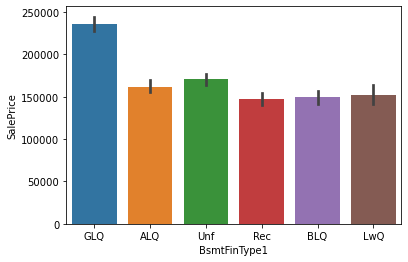

In [63]:
# Plotting the relationship between BsmtFinType1 & SalePrice
sns.barplot(x='BsmtFinType1',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [64]:
# Since BsmtExposure plays a big role, I will take the missing values and replace them with N/A
train_copy['BsmtFinType1'] = replace_missing(train_copy,'BsmtFinType1','N/A')
train_copy['BsmtFinType1'].isnull().sum()

0

In [65]:
# Exploring the BsmtFinType2 feature
train_copy['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

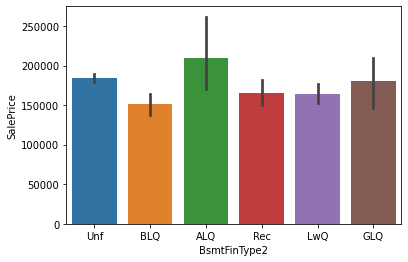

In [66]:
# Plotting the relationship between BsmtFinType2 & SalePrice
sns.barplot(x='BsmtFinType2',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [67]:
# Since BsmtFinType2 is very skewed + doesn't show a clear relationship with Sale Price, I will remove it
train_copy = train_copy.drop('BsmtFinType2',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000.0,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970.0,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000.0,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000.0,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990.0,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970.0,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950.0,4.219508,0.000000


##### Dealing with the Garage features that have missing values

In [68]:
# Exploring GarageType 
train_copy['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

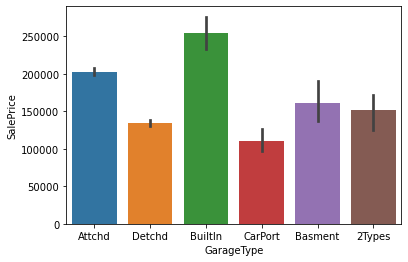

In [69]:
# Exploring GarageType's relationship with SalePrice
sns.barplot(x='GarageType',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [70]:
# Since Garage Type does matter in determining Sale Price, I will keep it and fix the missing values
train_copy['GarageType'] = replace_missing(train_copy,'GarageType','N/A')
train_copy['GarageType'].isnull().sum()

0

In [71]:
# Exploring GarageFinish
train_copy['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

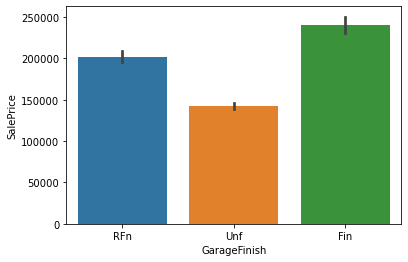

In [72]:
# Exploring GarageFinish's relationship with SalePrice
sns.barplot(x='GarageFinish',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [73]:
# Since Garage Finish does matter in determining Sale Price, I will keep it and fix the missing values
train_copy['GarageFinish'] = replace_missing(train_copy,'GarageFinish','N/A')
train_copy['GarageFinish'].isnull().sum()

0

In [74]:
# Exploring GarageQual 
train_copy['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

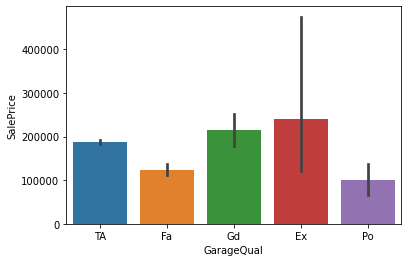

In [75]:
# Exploring GarageQual's relationship with SalePrice
sns.barplot(x='GarageQual',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [76]:
# Since GarageQual is very skewed, I will remove it
train_copy = train_copy.drop('GarageQual',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000.0,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970.0,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000.0,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000.0,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990.0,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970.0,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950.0,4.219508,0.000000


In [77]:
# Exploring GarageCond 
train_copy['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [78]:
# Since GarageCond is very skewed, I will remove it
train_copy = train_copy.drop('GarageCond',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000.0,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970.0,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000.0,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000.0,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990.0,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970.0,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950.0,4.219508,0.000000


##### Exploring the remaining object features with missing values

In [79]:
# Exploring MasVnrType
train_copy['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

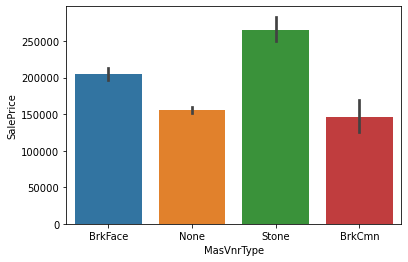

In [80]:
# Exploring MasVnrType's relationship with SalePrice
sns.barplot(x='MasVnrType',y='SalePrice',data=train_copy,estimator=np.mean)
plt.show()

In [81]:
# Since MasVnrType does matter in determining Sale Price, I will keep it and fix the missing values
train_copy['MasVnrType'] = replace_missing(train_copy,'MasVnrType','None')
train_copy['MasVnrType'].isnull().sum()

0

In [82]:
# Exploring Electrical
train_copy['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [83]:
# Since Electrical is very skewed, I will remove it
train_copy = train_copy.drop('Electrical',axis=1)
train_copy

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2000.0,4.174387,14.000000
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1970.0,4.382027,0.000000
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2000.0,4.219508,12.727922
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345,0.000000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000.0,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,8,2007,WD,Normal,175000,1990.0,4.127134,0.000000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2010,WD,Normal,210000,1970.0,4.442651,10.908712
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,2500,5,2010,WD,Normal,266500,1940.0,4.189655,0.000000
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,4,2010,WD,Normal,142125,1950.0,4.219508,0.000000


In [84]:
# Final Check to see that there are no missing values
missing_vals = missing(train_copy)
missing_vals

{'Id': 0.0,
 'MSSubClass': 0.0,
 'MSZoning': 0.0,
 'LotArea': 0.0,
 'Street': 0.0,
 'LotShape': 0.0,
 'LandContour': 0.0,
 'Utilities': 0.0,
 'LotConfig': 0.0,
 'LandSlope': 0.0,
 'Neighborhood': 0.0,
 'Condition1': 0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': 0.0,
 'OverallQual': 0.0,
 'OverallCond': 0.0,
 'YearBuilt': 0.0,
 'YearRemodAdd': 0.0,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': 0.0,
 'Exterior2nd': 0.0,
 'MasVnrType': 0.0,
 'ExterQual': 0.0,
 'ExterCond': 0.0,
 'Foundation': 0.0,
 'BsmtQual': 0.0,
 'BsmtCond': 0.0,
 'BsmtExposure': 0.0,
 'BsmtFinType1': 0.0,
 'BsmtFinSF1': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': 0.0,
 'HeatingQC': 0.0,
 'CentralAir': 0.0,
 '1stFlrSF': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0,
 'BsmtFullBath': 0.0,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0,
 'HalfBath': 0.0,
 'BedroomAbvGr': 0.0,
 'KitchenAbvGr': 0.0,
 'KitchenQual': 0.0,
 'TotRmsAbvGrd': 0.0,
 'Functional': 0.0,
 

Final remarks for this subsection:
* In this subsection, I dealt with all missing values how I saw fit.
* I added + subtracted features to make an improved dataset for my machine learning models

### Taking a Look at the Data as a whole

In [85]:
# Getting information about each feature
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotArea         1460 non-null   int64  
 4   Street          1460 non-null   object 
 5   LotShape        1460 non-null   object 
 6   LandContour     1460 non-null   object 
 7   Utilities       1460 non-null   object 
 8   LotConfig       1460 non-null   object 
 9   LandSlope       1460 non-null   object 
 10  Neighborhood    1460 non-null   object 
 11  Condition1      1460 non-null   object 
 12  Condition2      1460 non-null   object 
 13  BldgType        1460 non-null   object 
 14  HouseStyle      1460 non-null   object 
 15  OverallQual     1460 non-null   int64  
 16  OverallCond     1460 non-null   int64  
 17  YearBuilt       1460 non-null   i

In [86]:
# Splitting the features by the data type
obj_features = []
num_features =[]

for i in train_copy.keys():
    if train_copy[i].dtype == 'object':
        obj_features.append(i)
    else:
        num_features.append(i)
        
# Printing out the lists
obj_features, num_features

(['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'PavedDrive',
  'SaleType',
  'SaleCondition',
  'GarageYrBltDec'],
 ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  '

#### Playing with the Numerical Features

In [87]:
# Printing out the numerical features
num_features

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LogLotFrontage',
 'SqrtMasVnrArea']

In [88]:
# Splitting the Continous number features and the discrete/categorical features
cont_features = ['Id','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea','MiscVal','LogLotFrontage','SqrtMasVnrArea','SalePrice']
cat_num_features = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath',
                    'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                   'GarageCars','MoSold','YrSold']

In [89]:
# Creating a dataframe only consisting of the continous numerical features
cont_num_data = train_copy[cont_features]
cont_num_data

,Id,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LogLotFrontage,SqrtMasVnrArea,SalePrice
0,1,8450,706,0,150,856,856,854,0,1710,...,0,61,0,0,0,0,0,4.174387,14.000000,208500
1,2,9600,978,0,284,1262,1262,0,0,1262,...,298,0,0,0,0,0,0,4.382027,0.000000,181500
2,3,11250,486,0,434,920,920,866,0,1786,...,0,42,0,0,0,0,0,4.219508,12.727922,223500
3,4,9550,216,0,540,756,961,756,0,1717,...,0,35,272,0,0,0,0,4.094345,0.000000,140000
4,5,14260,655,0,490,1145,1145,1053,0,2198,...,192,84,0,0,0,0,0,4.430817,18.708287,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,0,0,953,953,953,694,0,1647,...,0,40,0,0,0,0,0,4.127134,0.000000,175000
1456,1457,13175,790,163,589,1542,2073,0,0,2073,...,349,0,0,0,0,0,0,4.442651,10.908712,210000
1457,1458,9042,275,0,877,1152,1188,1152,0,2340,...,0,60,0,0,0,0,2500,4.189655,0.000000,266500
1458,1459,9717,49,1029,0,1078,1078,0,0,1078,...,366,0,112,0,0,0,0,4.219508,0.000000,142125


In [90]:
# Taking a look at the correlation matrix to see if we can eliminate any uncorrelated features
cont_num_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice         1.000000
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
SqrtMasVnrArea    0.455972
BsmtFinSF1        0.386420
LogLotFrontage    0.331765
WoodDeckSF        0.324413
2ndFlrSF          0.319334
OpenPorchSF       0.315856
LotArea           0.263843
BsmtUnfSF         0.214479
ScreenPorch       0.111447
PoolArea          0.092404
3SsnPorch         0.044584
BsmtFinSF2       -0.011378
MiscVal          -0.021190
Id               -0.021917
LowQualFinSF     -0.025606
EnclosedPorch    -0.128578
Name: SalePrice, dtype: float64

In [91]:
# Removing the features that aren't correlated to SalePrice
train_copy = train_copy.drop(['3SsnPorch','BsmtFinSF2','MiscVal','Id','LowQualFinSF'],axis=1)
cont_num_data = cont_num_data.drop(['3SsnPorch','BsmtFinSF2','MiscVal','Id','LowQualFinSF'],axis=1)
train_copy

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltDec,LogLotFrontage,SqrtMasVnrArea
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,208500,2000.0,4.174387,14.000000
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,2007,WD,Normal,181500,1970.0,4.382027,0.000000
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,223500,2000.0,4.219508,12.727922
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,140000,1990.0,4.094345,0.000000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,250000,2000.0,4.430817,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,8,2007,WD,Normal,175000,1990.0,4.127134,0.000000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,2,2010,WD,Normal,210000,1970.0,4.442651,10.908712
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,5,2010,WD,Normal,266500,1940.0,4.189655,0.000000
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,4,2010,WD,Normal,142125,1950.0,4.219508,0.000000


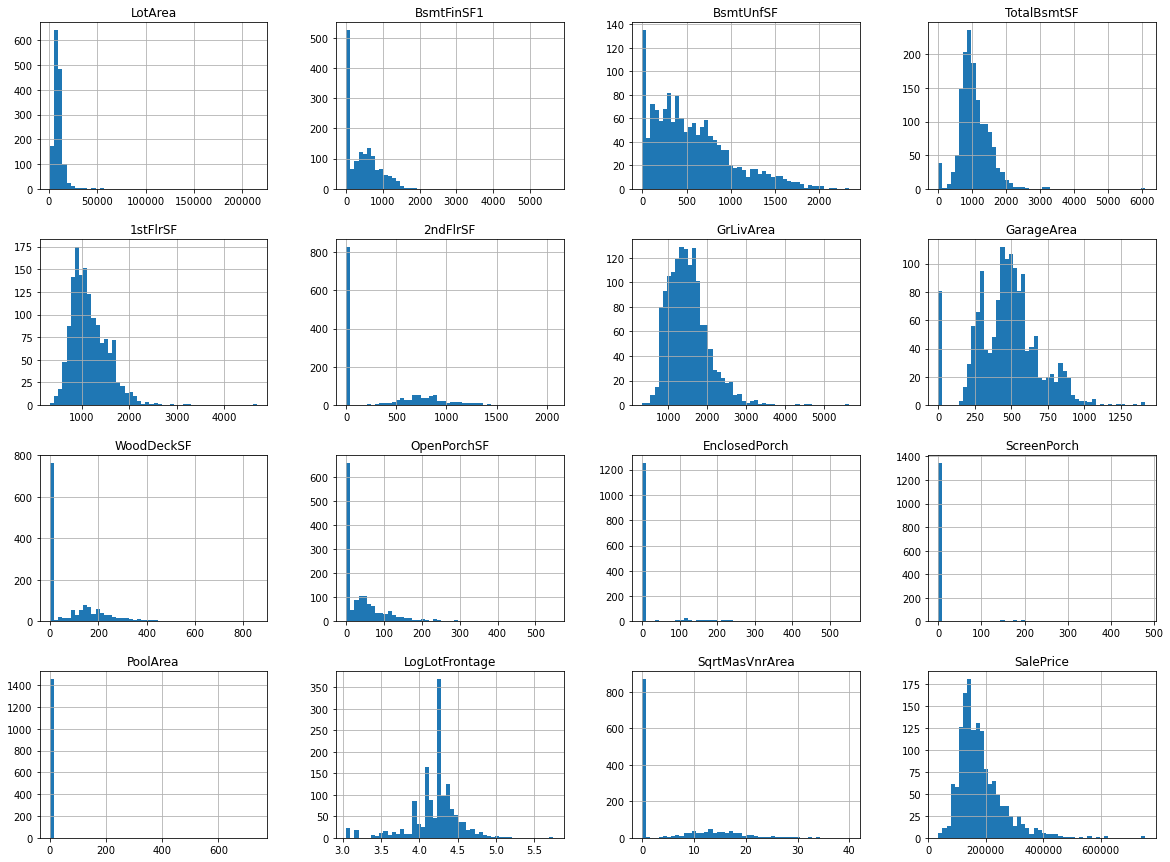

In [92]:
# Taking a look at the distributions of the remaining numerical features
cont_num_data.hist(bins=50,figsize=(20,15))
plt.show()

From the distributions above, I can clearly see that mostly every feature, including SalePrice, is skewed. This means I would need to transform all of the features to a normal distribution. Furthermore, most features have a cap at 0. This is ok because all features are values that can't go below 0.  
  
Note: I am going to remove PoolArea, ScreenPorch, and EnclosedPorch because 1) these values aren't very correlated with SalePrice and 2) according to the distributions above, they are very,very skewed. 

In [93]:
# Dropping PoolArea, ScreenPorch ,and EnclosedPorch
train_copy = train_copy.drop(['PoolArea','ScreenPorch','EnclosedPorch'],axis=1)
cont_num_data = cont_num_data.drop(['PoolArea','ScreenPorch','EnclosedPorch'],axis=1)

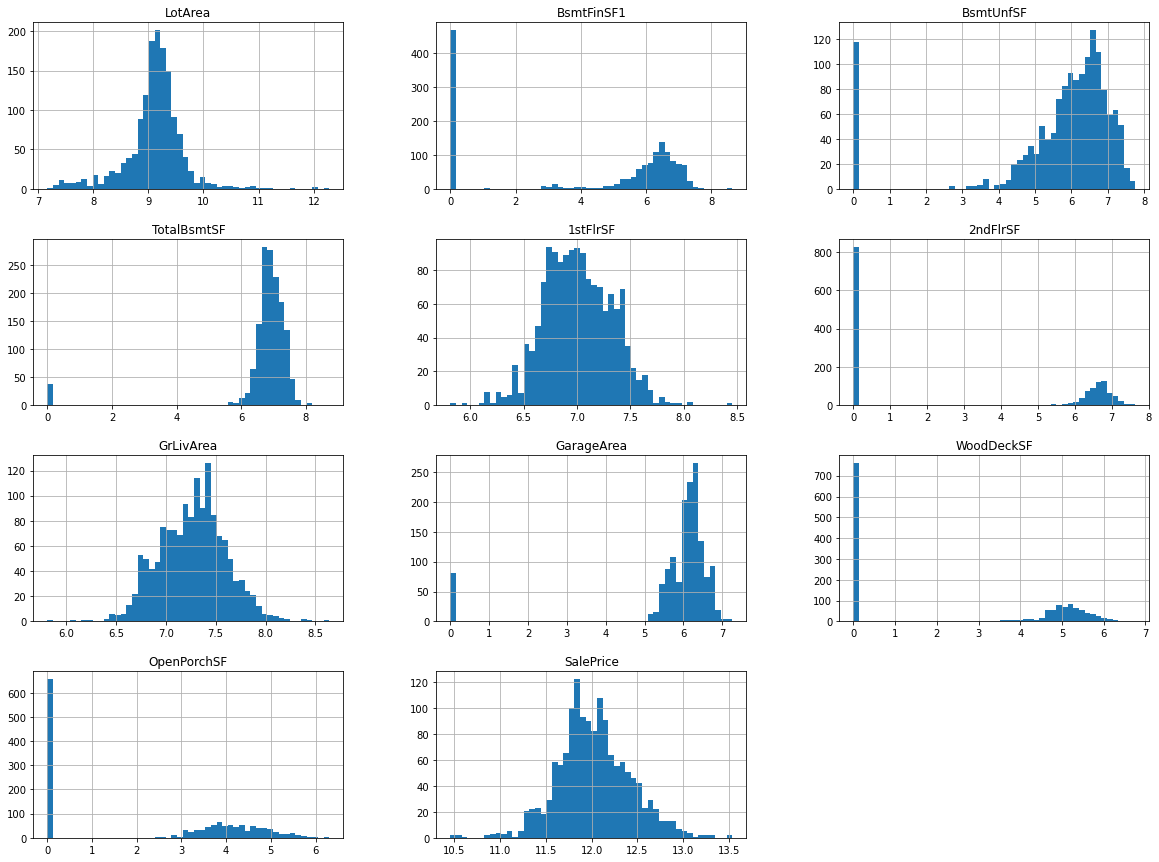

In [94]:
# Creating an array to store the num values to apply the transformation to 
transform = ['LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea',
            'WoodDeckSF','OpenPorchSF','SalePrice']

# Making a temp data frame that applies the log(x+1) transformation on the features.
temp = np.log(cont_num_data[transform]+1)
temp.hist(bins=50,figsize=(20,15))
plt.show()

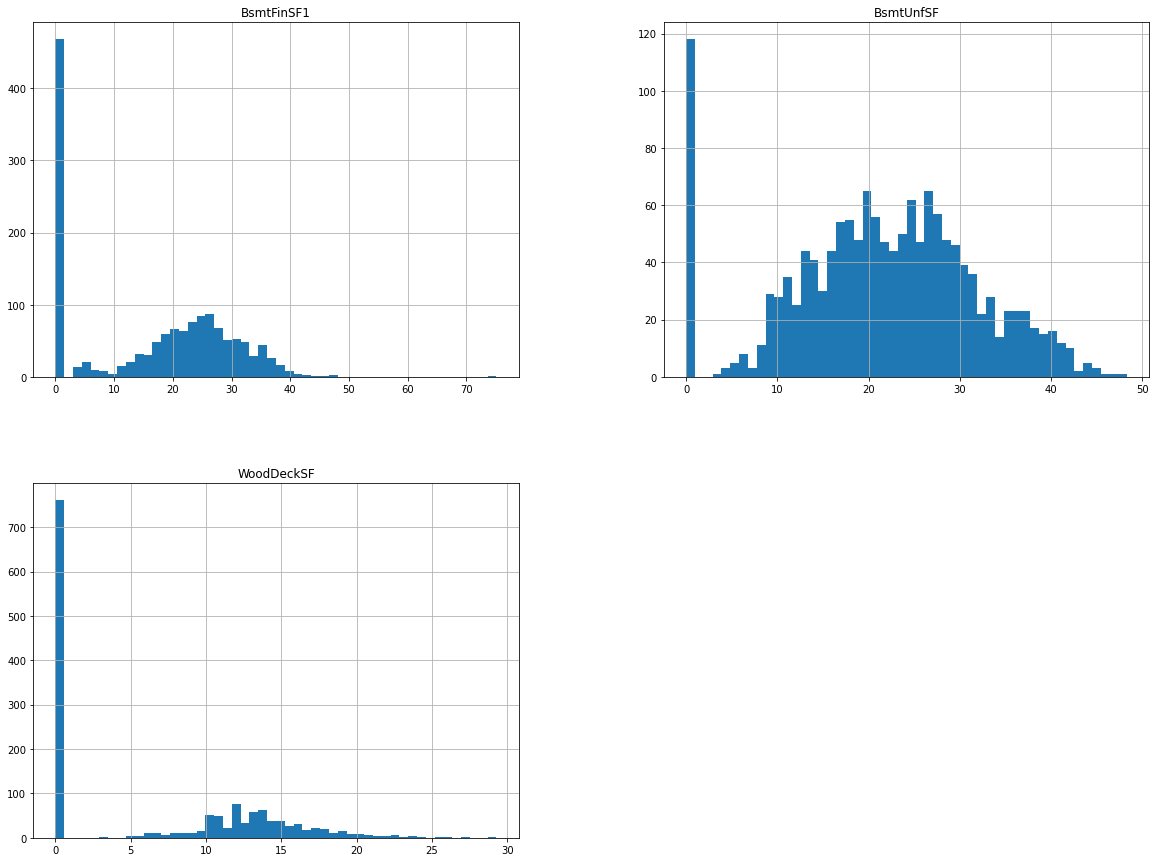

In [95]:
temp2 = cont_num_data[['BsmtFinSF1','BsmtUnfSF','WoodDeckSF']] ** .5
temp2.hist(bins=50,figsize=(20,15))
plt.show()

From the above 2 distribution bunches, I tested out the log(x+1) transformation on the numerical features. I found that some features are in a better normal distribution if they are transformed via the application of the square root. With that being said, I am going to transform the numerical features accordingly. 

In [96]:
# Splitting up the log transformation features & the square root transformation features
sqrt_features = ['BsmtFinSF1','BsmtUnfSF','WoodDeckSF']
log_features = ['LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','OpenPorchSF','SalePrice']

In [97]:
# Applying the transformations & adding it to a num_cont_features array 
num_cont_features = []
for x in sqrt_features:
    train_copy['sqrt_' + x] = train_copy[x] ** .5
    num_cont_features.append('sqrt_' + x)
for y in log_features:
    train_copy['log' + y] = np.log(train_copy[y] + 1)
    num_cont_features.append('log' + y)

num_cont_features.append('LogLotFrontage')
num_cont_features.append('SqrtMasVnrArea')
train_copy, num_cont_features

(      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
 0             60       RL     8450   Pave      Reg         Lvl    AllPub   
 1             20       RL     9600   Pave      Reg         Lvl    AllPub   
 2             60       RL    11250   Pave      IR1         Lvl    AllPub   
 3             70       RL     9550   Pave      IR1         Lvl    AllPub   
 4             60       RL    14260   Pave      IR1         Lvl    AllPub   
 ...          ...      ...      ...    ...      ...         ...       ...   
 1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
 1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
 1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
 1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
 1459          20       RL     9937   Pave      Reg         Lvl    AllPub   
 
      LotConfig LandSlope Neighborhood  ... sqrt_BsmtUnfSF sqrt_WoodDeckSF

In [98]:
# Removing the originals
log_features.remove('SalePrice')
train_copy = train_copy.drop(sqrt_features,axis=1)
train_copy = train_copy.drop(log_features,axis=1)
train_copy

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,sqrt_BsmtUnfSF,sqrt_WoodDeckSF,logLotArea,logTotalBsmtSF,log1stFlrSF,log2ndFlrSF,logGrLivArea,logGarageArea,logOpenPorchSF,logSalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,12.247449,0.000000,9.042040,6.753438,6.753438,6.751101,7.444833,6.308098,4.127134,12.247699
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,16.852300,17.262677,9.169623,7.141245,7.141245,0.000000,7.141245,6.133398,0.000000,12.109016
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,20.832667,0.000000,9.328212,6.825460,6.825460,6.765039,7.488294,6.411818,3.761200,12.317171
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,23.237900,0.000000,9.164401,6.629363,6.869014,6.629363,7.448916,6.466145,3.583519,11.849405
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,22.135944,13.856406,9.565284,7.044033,7.044033,6.960348,7.695758,6.729824,4.442651,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,30.870698,0.000000,8.976894,6.860664,6.860664,6.543912,7.407318,6.133398,3.713572,12.072547
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,24.269322,18.681542,9.486152,7.341484,7.637234,0.000000,7.637234,6.216606,0.000000,12.254868
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,29.614186,0.000000,9.109746,7.050123,7.080868,7.050123,7.758333,5.533389,4.110874,12.493133
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,0.000000,19.131126,9.181735,6.983790,6.983790,0.000000,6.983790,5.484797,0.000000,11.864469


In [99]:
# Getting the transformed features into a dataframe
num_cont_data = train_copy[num_cont_features]

# Describing each transformed feature
num_cont_data.describe()

,sqrt_BsmtFinSF1,sqrt_BsmtUnfSF,sqrt_WoodDeckSF,logLotArea,logTotalBsmtSF,log1stFlrSF,log2ndFlrSF,logGrLivArea,logGarageArea,logOpenPorchSF,logSalePrice,LogLotFrontage,SqrtMasVnrArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,16.454910,21.424778,6.469154,9.110966,6.750560,7.008452,2.864586,7.268512,5.808156,2.308541,12.024057,4.198687,6.013838
std,13.152724,10.406414,7.240889,0.517369,1.145712,0.317431,3.293311,0.333303,1.455118,2.152387,0.399449,0.320396,8.185155
min,0.000000,0.000000,0.000000,7.170888,0.000000,5.814131,0.000000,5.814131,0.000000,0.000000,10.460271,3.044522,0.000000
25%,0.000000,14.933185,0.000000,8.929898,6.680541,6.783325,0.000000,7.030415,5.815592,0.000000,11.775105,4.094345,0.000000
50%,19.583152,21.851746,0.000000,9.156887,6.900227,6.992096,0.000000,7.289611,6.175867,3.258097,12.001512,4.234107,0.000000
75%,26.688011,28.425341,12.961481,9.358976,7.169542,7.238676,6.591674,7.483104,6.357842,4.234107,12.273736,4.369448,12.815995
max,75.126560,48.332184,29.274562,12.279537,8.717846,8.453827,7.633370,8.638171,7.257708,6.306275,13.534474,5.746203,40.000000


From the above descriptions, it is evident that I need to feature scale!

#### Playing with the Categorical Features

In [100]:
# Building a dataframe with the categorical features
obj_features.extend(cat_num_features)
obj_features.append('SalePrice')
cat_data = train_copy[obj_features]
cat_data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,1,3,1,8,0,2,2,2008,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2,0,3,1,6,1,2,5,2007,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,1,3,1,6,1,2,9,2008,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1,0,3,1,7,1,3,2,2006,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2,1,4,1,9,1,3,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2,1,3,1,7,1,2,8,2007,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,2,0,3,1,7,2,2,2,2010,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,2,0,4,1,9,2,1,5,2010,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,1,0,2,1,5,0,1,4,2010,142125


----------MSZoning Report----------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


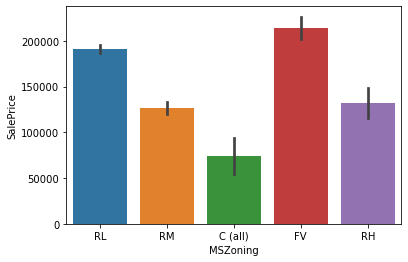


----------Street Report----------
Pave    1454
Grvl       6
Name: Street, dtype: int64


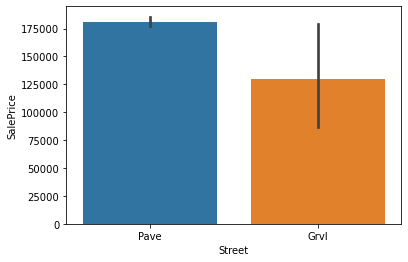


----------LotShape Report----------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


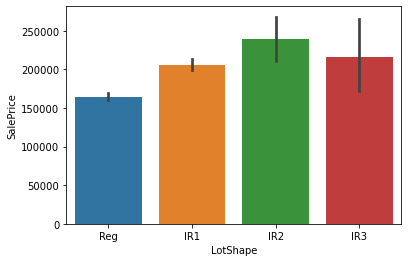


----------LandContour Report----------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


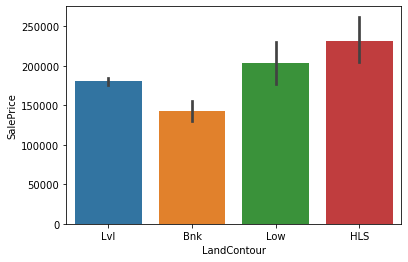


----------Utilities Report----------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


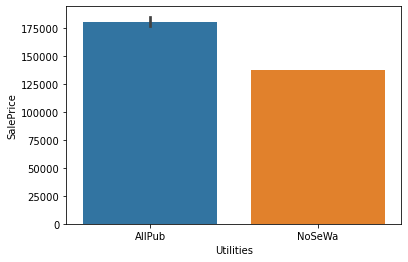


----------LotConfig Report----------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


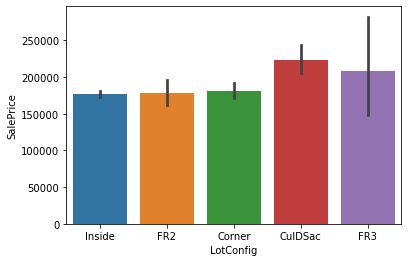


----------LandSlope Report----------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


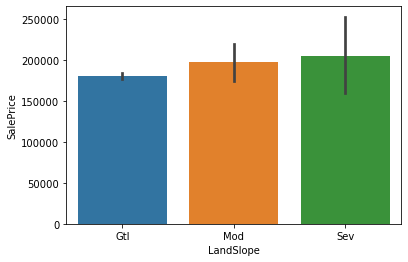


----------Neighborhood Report----------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


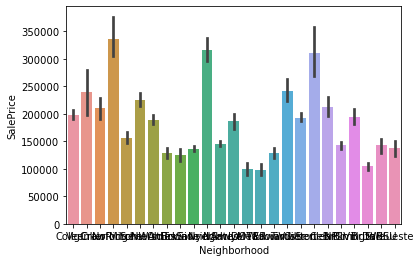


----------Condition1 Report----------
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


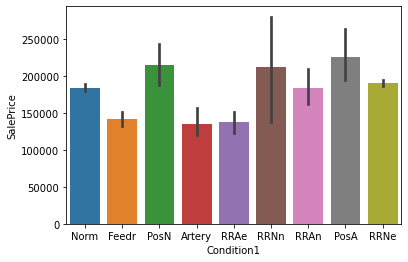


----------Condition2 Report----------
Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64


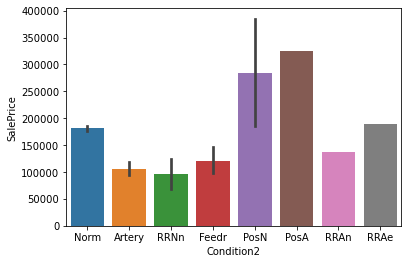


----------BldgType Report----------
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


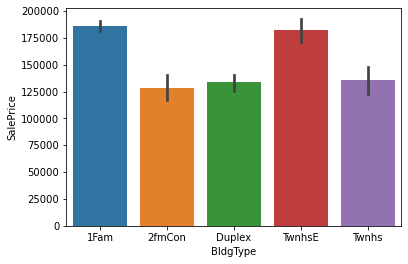


----------HouseStyle Report----------
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


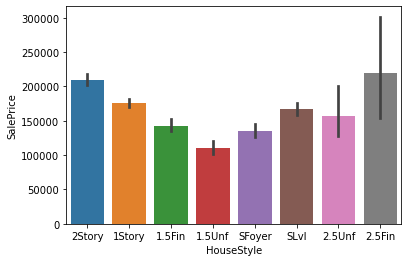


----------RoofStyle Report----------
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


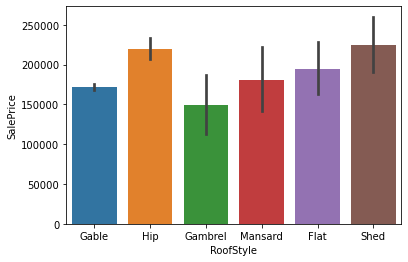


----------RoofMatl Report----------
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
ClyTile       1
Metal         1
Name: RoofMatl, dtype: int64


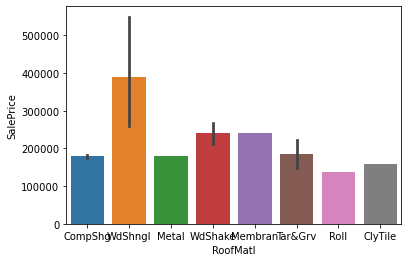


----------Exterior1st Report----------
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64


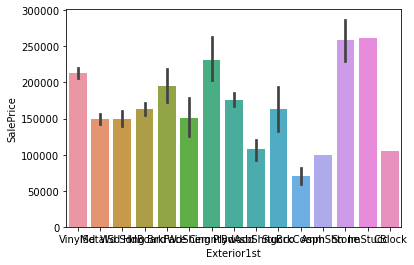


----------Exterior2nd Report----------
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


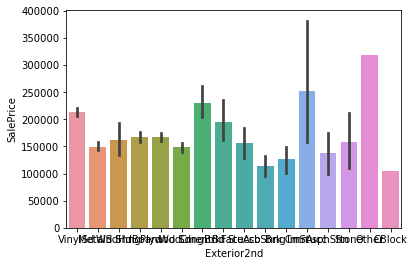


----------MasVnrType Report----------
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


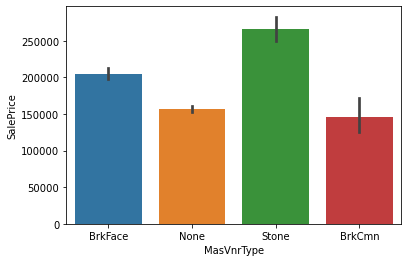


----------ExterQual Report----------
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


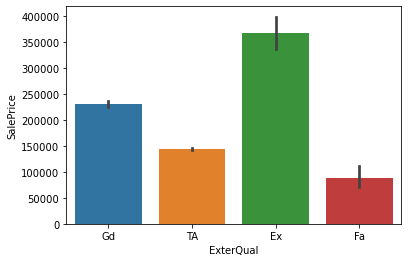


----------ExterCond Report----------
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


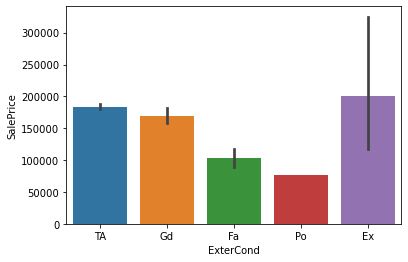


----------Foundation Report----------
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


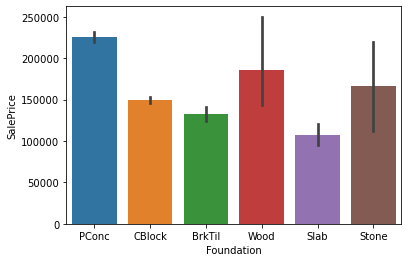


----------BsmtQual Report----------
TA     649
Gd     618
Ex     121
N/A     37
Fa      35
Name: BsmtQual, dtype: int64


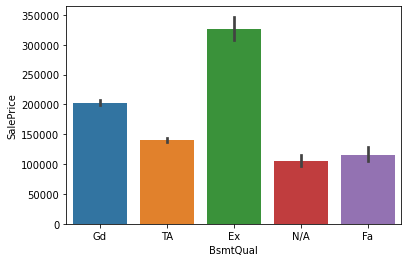


----------BsmtCond Report----------
TA     1311
Gd       65
Fa       45
N/A      37
Po        2
Name: BsmtCond, dtype: int64


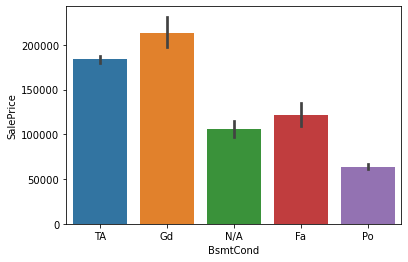


----------BsmtExposure Report----------
No     953
Av     221
Gd     134
Mn     114
N/A     38
Name: BsmtExposure, dtype: int64


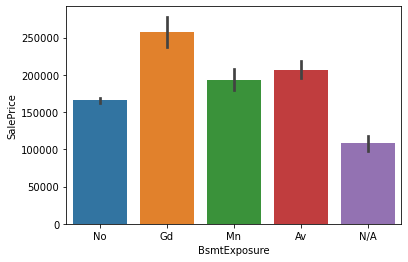


----------BsmtFinType1 Report----------
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
N/A     37
Name: BsmtFinType1, dtype: int64


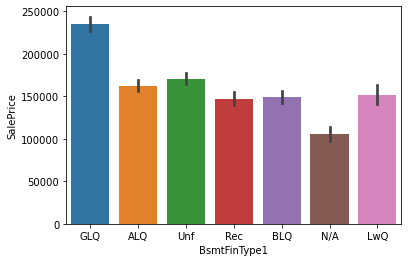


----------Heating Report----------
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


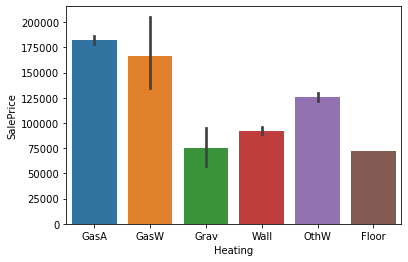


----------HeatingQC Report----------
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


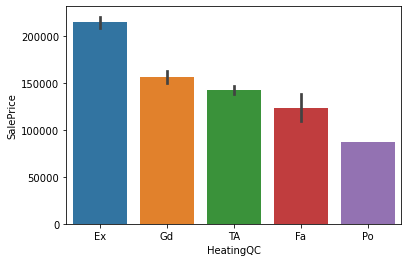


----------CentralAir Report----------
Y    1365
N      95
Name: CentralAir, dtype: int64


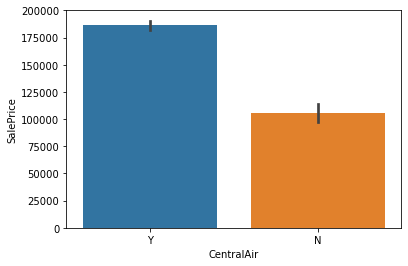


----------KitchenQual Report----------
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


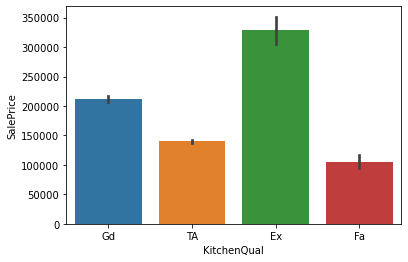


----------Functional Report----------
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


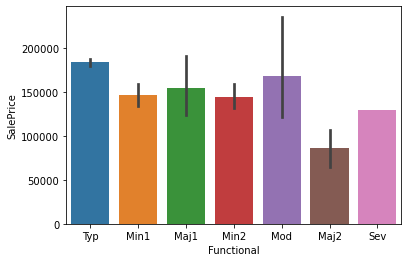


----------FireplaceQu Report----------
NF    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


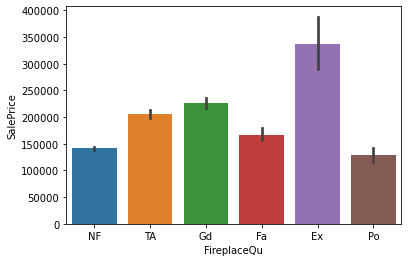


----------GarageType Report----------
Attchd     870
Detchd     387
BuiltIn     88
N/A         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


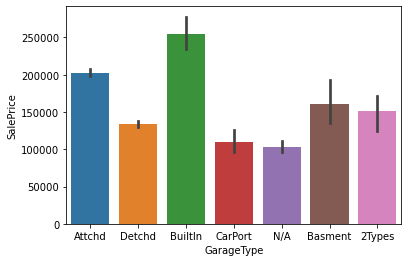


----------GarageFinish Report----------
Unf    605
RFn    422
Fin    352
N/A     81
Name: GarageFinish, dtype: int64


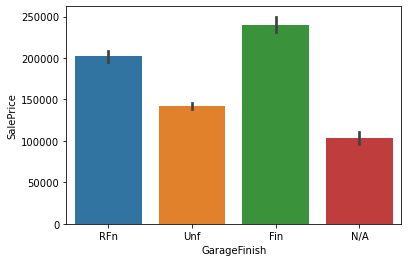


----------PavedDrive Report----------
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


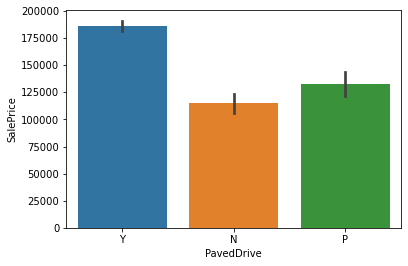


----------SaleType Report----------
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


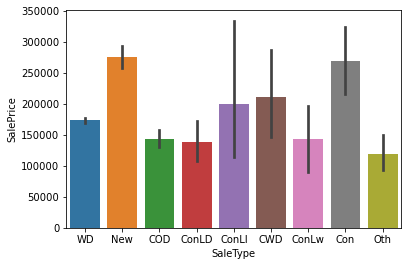


----------SaleCondition Report----------
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


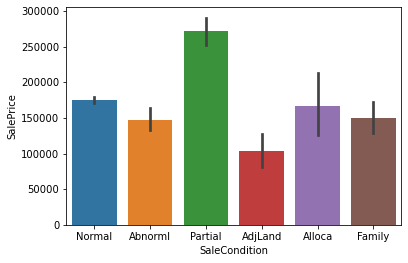


----------GarageYrBltDec Report----------
2000.0    399
1990.0    196
1970.0    186
1960.0    185
1950.0    151
1980.0     95
N/A        81
1940.0     55
1920.0     51
1930.0     41
1910.0     14
1900.0      3
2010.0      3
Name: GarageYrBltDec, dtype: int64


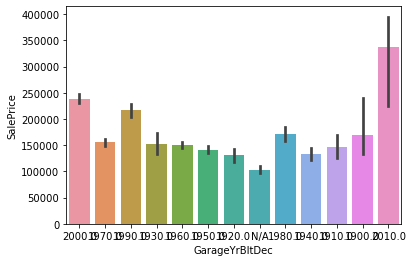


----------MSSubClass Report----------
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


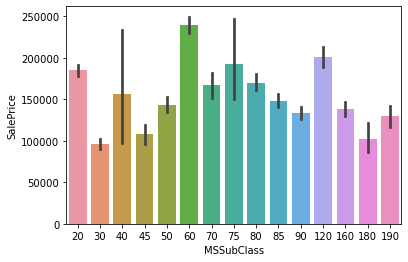


----------OverallQual Report----------
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


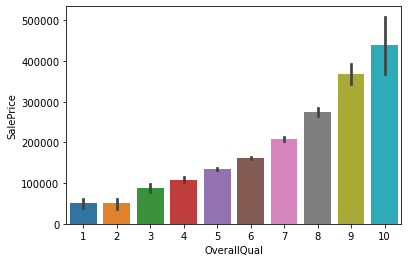


----------OverallCond Report----------
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


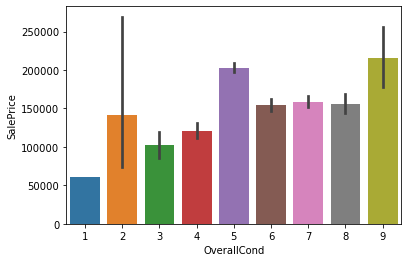


----------YearBuilt Report----------
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64


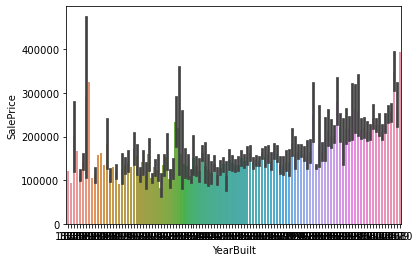


----------YearRemodAdd Report----------
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1986      5
1952      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64


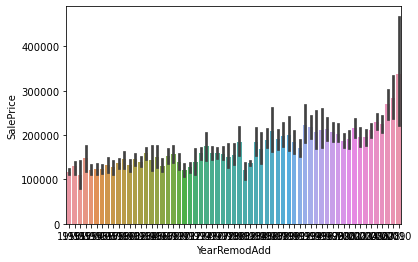


----------BsmtFullBath Report----------
0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64


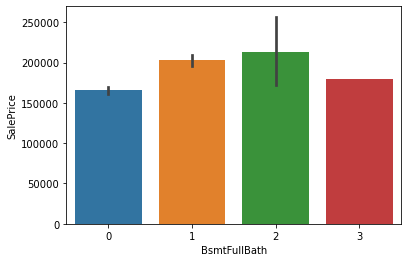


----------BsmtHalfBath Report----------
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


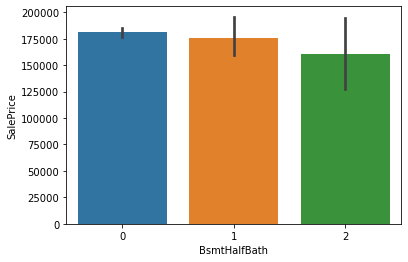


----------FullBath Report----------
2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64


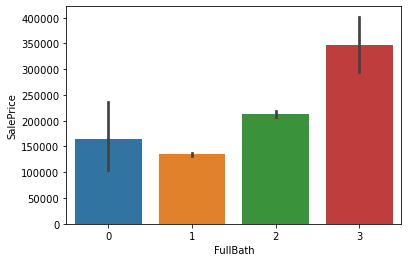


----------HalfBath Report----------
0    913
1    535
2     12
Name: HalfBath, dtype: int64


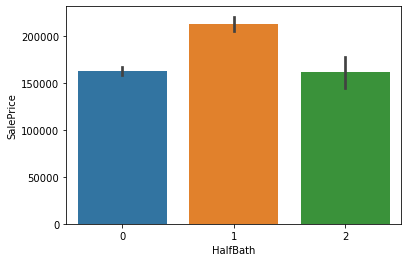


----------BedroomAbvGr Report----------
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64


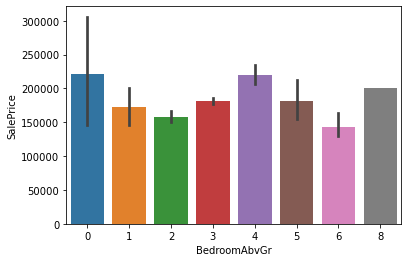


----------KitchenAbvGr Report----------
1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


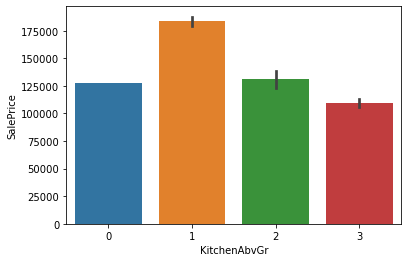


----------TotRmsAbvGrd Report----------
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64


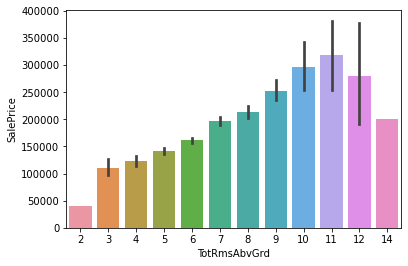


----------Fireplaces Report----------
0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


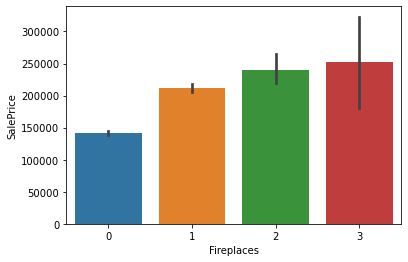


----------GarageCars Report----------
2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


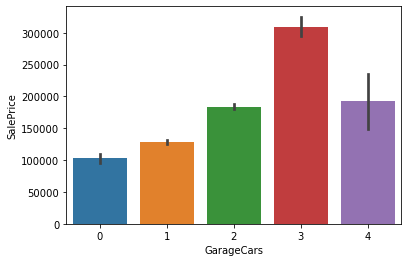


----------MoSold Report----------
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


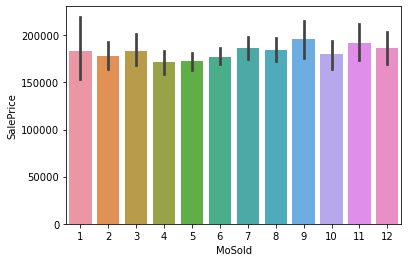


----------YrSold Report----------
2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


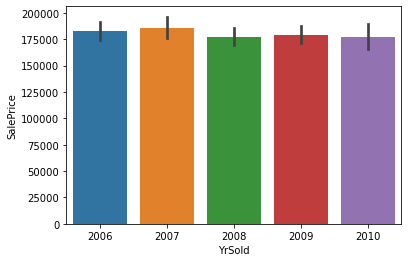


----------SalePrice Report----------
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
337000     1
412500     1
306000     1
195400     1
206000     1
Name: SalePrice, Length: 663, dtype: int64


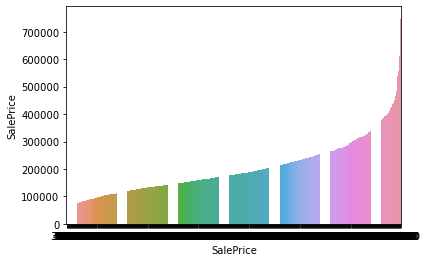

In [101]:
# Checking for skeweness in the categorical features
for i in cat_data.keys():
    print('----------' + i + ' Report----------')
    print(cat_data[i].value_counts())
    sns.barplot(x=i,y='SalePrice',data=cat_data)
    plt.show()
    print()

From the generated report above, I was able to remove some features + keep some features. However, I just wanted to take a look at YearRemodAdd & YearBuilt to get a full understanding of what I should do with them.

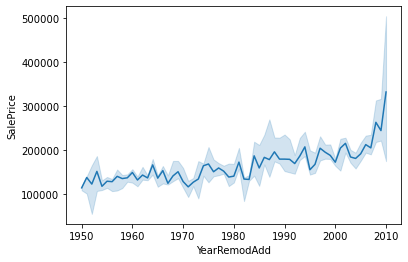

In [102]:
# Taking a look at the relationship between YearRemodAdd & SalePrice
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

In [103]:
# Taking a look at the skeweness + range of keys
dict(train_copy['YearRemodAdd'].value_counts().sort_values(ascending=False))

{1950: 178,
 2006: 97,
 2007: 76,
 2005: 73,
 2004: 62,
 2000: 55,
 2003: 51,
 2002: 48,
 2008: 40,
 1996: 36,
 1998: 36,
 1995: 31,
 1976: 30,
 1999: 30,
 1970: 26,
 1977: 25,
 1997: 25,
 2009: 23,
 1994: 22,
 2001: 21,
 1972: 20,
 1993: 19,
 1965: 19,
 1959: 18,
 1971: 18,
 1992: 17,
 1968: 17,
 1978: 16,
 1966: 15,
 1958: 15,
 1990: 15,
 1962: 14,
 1954: 14,
 1991: 14,
 1969: 14,
 1963: 13,
 1980: 12,
 1960: 12,
 1967: 12,
 1989: 11,
 1973: 11,
 1964: 11,
 1956: 10,
 1975: 10,
 1979: 10,
 1953: 10,
 1987: 10,
 1985: 9,
 1955: 9,
 1957: 9,
 1988: 9,
 1961: 8,
 1981: 8,
 1974: 7,
 1982: 7,
 1984: 7,
 2010: 6,
 1983: 5,
 1986: 5,
 1952: 5,
 1951: 4}

From the above cells, I found that YearRemodAdd has a moderate, positive correlation with SalePrice. However, it is very skewed + there are 61 categories!! I am going to try to built a feature that will state whether a house has been remodeled prior to or after 2000. This will cut the categories to 2 ,and hopefully will increase/not lose correlation. 

In [104]:
# Creating to column
train_copy['RemodAdd2'] = 'N'

# Fixing the values 
for i in range(train_copy.shape[0]):
    if train_copy['YearRemodAdd'][i] >= 2000:
        train_copy['RemodAdd2'][i] = 'Y'

train_copy

<ipython-input-104-deee8d83397a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['RemodAdd2'][i] = 'Y'


,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,sqrt_WoodDeckSF,logLotArea,logTotalBsmtSF,log1stFlrSF,log2ndFlrSF,logGrLivArea,logGarageArea,logOpenPorchSF,logSalePrice,RemodAdd2
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.000000,9.042040,6.753438,6.753438,6.751101,7.444833,6.308098,4.127134,12.247699,Y
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,17.262677,9.169623,7.141245,7.141245,0.000000,7.141245,6.133398,0.000000,12.109016,N
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0.000000,9.328212,6.825460,6.825460,6.765039,7.488294,6.411818,3.761200,12.317171,Y
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0.000000,9.164401,6.629363,6.869014,6.629363,7.448916,6.466145,3.583519,11.849405,N
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,13.856406,9.565284,7.044033,7.044033,6.960348,7.695758,6.729824,4.442651,12.429220,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,0.000000,8.976894,6.860664,6.860664,6.543912,7.407318,6.133398,3.713572,12.072547,Y
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,18.681542,9.486152,7.341484,7.637234,0.000000,7.637234,6.216606,0.000000,12.254868,N
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,0.000000,9.109746,7.050123,7.080868,7.050123,7.758333,5.533389,4.110874,12.493133,Y
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,19.131126,9.181735,6.983790,6.983790,0.000000,6.983790,5.484797,0.000000,11.864469,N


N    908
Y    552
Name: RemodAdd2, dtype: int64


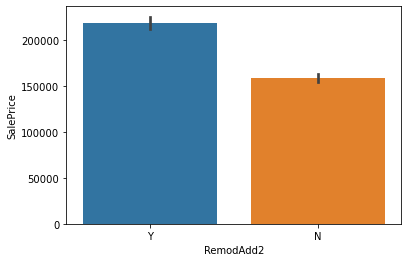

In [105]:
# Printing out a value counts of the new feature
print(train_copy['RemodAdd2'].value_counts())
# Using a barplot to identify if there is a correlation between my newly created feature + Sale Price
sns.barplot(x='RemodAdd2',y='SalePrice',data=train_copy)
plt.show()

In [106]:
# Since the newly created feature is good, I will delete the original one
train_copy = train_copy.drop('YearRemodAdd',axis=1)

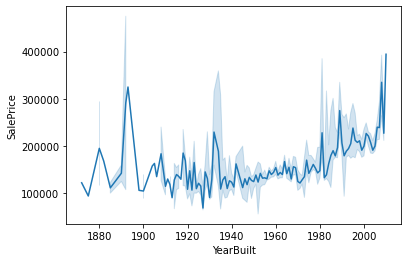

In [107]:
# Taking a look at the relationship between YearBuilt & SalePrice
sns.lineplot(x='YearBuilt',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

In [108]:
# Taking a look at the skeweness + range of keys
dict(train_copy['YearBuilt'].value_counts().sort_values(ascending=False))

{2006: 67,
 2005: 64,
 2004: 54,
 2007: 49,
 2003: 45,
 1976: 33,
 1977: 32,
 1920: 30,
 1959: 26,
 1998: 25,
 1999: 25,
 1970: 24,
 1965: 24,
 2000: 24,
 1954: 24,
 1958: 24,
 2008: 23,
 1972: 23,
 2002: 23,
 1968: 22,
 1971: 22,
 2001: 20,
 1957: 20,
 1950: 20,
 1962: 19,
 1994: 19,
 1995: 18,
 1966: 18,
 1940: 18,
 2009: 18,
 1960: 17,
 1910: 17,
 1993: 17,
 1967: 16,
 1978: 16,
 1963: 16,
 1955: 16,
 1925: 16,
 1964: 15,
 1996: 15,
 1941: 15,
 1961: 14,
 1956: 14,
 1997: 14,
 1969: 14,
 1948: 14,
 1992: 13,
 1953: 12,
 1949: 12,
 1990: 12,
 1988: 11,
 1973: 11,
 1974: 10,
 1915: 10,
 1980: 10,
 1900: 10,
 1936: 9,
 1930: 9,
 1984: 9,
 1926: 9,
 1979: 9,
 1975: 8,
 1939: 8,
 1922: 8,
 1916: 8,
 1914: 7,
 1918: 7,
 1928: 7,
 1946: 7,
 1923: 7,
 1924: 7,
 1951: 6,
 1945: 6,
 1921: 6,
 1931: 6,
 1982: 6,
 1935: 6,
 1952: 5,
 1947: 5,
 1981: 5,
 1937: 5,
 1985: 5,
 1986: 5,
 1991: 5,
 1938: 4,
 1983: 4,
 1880: 4,
 1932: 4,
 1929: 4,
 1989: 3,
 1919: 3,
 1987: 3,
 1912: 3,
 1927: 3,
 193

There are way too many categories, which is causing the data to be spread too thin. I will do something similar to what I did for YearRemodAdd. I will create a feature that categorizes the year built as prior to or after 2000. 

In [109]:
# Creating the Column
train_copy['YearBuilt2'] = 'N'

# Editting the column
for i in range(train_copy.shape[0]):
    if train_copy['YearBuilt'][i] >= 1975:
        train_copy['YearBuilt2'][i] = 'Y'

train_copy

<ipython-input-109-87a2bbf6a751>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['YearBuilt2'][i] = 'Y'


,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,logLotArea,logTotalBsmtSF,log1stFlrSF,log2ndFlrSF,logGrLivArea,logGarageArea,logOpenPorchSF,logSalePrice,RemodAdd2,YearBuilt2
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,9.042040,6.753438,6.753438,6.751101,7.444833,6.308098,4.127134,12.247699,Y,Y
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,9.169623,7.141245,7.141245,0.000000,7.141245,6.133398,0.000000,12.109016,N,Y
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,9.328212,6.825460,6.825460,6.765039,7.488294,6.411818,3.761200,12.317171,Y,Y
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,9.164401,6.629363,6.869014,6.629363,7.448916,6.466145,3.583519,11.849405,N,N
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,9.565284,7.044033,7.044033,6.960348,7.695758,6.729824,4.442651,12.429220,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,8.976894,6.860664,6.860664,6.543912,7.407318,6.133398,3.713572,12.072547,Y,Y
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,9.486152,7.341484,7.637234,0.000000,7.637234,6.216606,0.000000,12.254868,N,Y
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,9.109746,7.050123,7.080868,7.050123,7.758333,5.533389,4.110874,12.493133,Y,N
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,9.181735,6.983790,6.983790,0.000000,6.983790,5.484797,0.000000,11.864469,N,N


N    750
Y    710
Name: YearBuilt2, dtype: int64


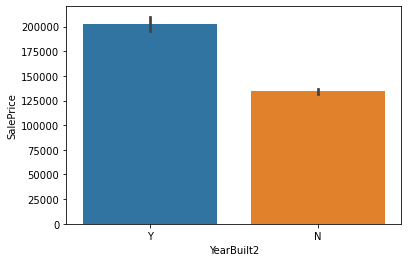

In [110]:
# Seeing if my newly created feature is good or not
print(train_copy['YearBuilt2'].value_counts())
sns.barplot(x='YearBuilt2',y='SalePrice',data=train_copy,estimator=np.median)
plt.show()

In [111]:
# Since this new feature is good, I will remove the original one
train_copy = train_copy.drop('YearBuilt',axis=1)

In [112]:
train_copy

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,logLotArea,logTotalBsmtSF,log1stFlrSF,log2ndFlrSF,logGrLivArea,logGarageArea,logOpenPorchSF,logSalePrice,RemodAdd2,YearBuilt2
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,9.042040,6.753438,6.753438,6.751101,7.444833,6.308098,4.127134,12.247699,Y,Y
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,9.169623,7.141245,7.141245,0.000000,7.141245,6.133398,0.000000,12.109016,N,Y
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,9.328212,6.825460,6.825460,6.765039,7.488294,6.411818,3.761200,12.317171,Y,Y
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,9.164401,6.629363,6.869014,6.629363,7.448916,6.466145,3.583519,11.849405,N,N
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,9.565284,7.044033,7.044033,6.960348,7.695758,6.729824,4.442651,12.429220,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,8.976894,6.860664,6.860664,6.543912,7.407318,6.133398,3.713572,12.072547,Y,Y
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,9.486152,7.341484,7.637234,0.000000,7.637234,6.216606,0.000000,12.254868,N,Y
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,9.109746,7.050123,7.080868,7.050123,7.758333,5.533389,4.110874,12.493133,Y,N
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,9.181735,6.983790,6.983790,0.000000,6.983790,5.484797,0.000000,11.864469,N,N


__This marks the end of EDA. Below is the final list of all necessary transformations for me to make:__  
  
Final Transformation List:
1. Drop BsmtFinType2, GarageQual, GarageCond, Electrical, 3SsnProch, BsmtFinSF2, MiscVal,Id, LowQualFinSF, PoolArea, ScreenPorch, EnclosedPorch, Alley, PoolQC, Fence, MiscFeature,  Street,  LandContour, Utilities,  LotConfig,  LandSlope,  Condition1, Condition2,  BldgType, RoofStyle,  RoofMatl, ExterCond, BsmtCond, Heating, CentralAir, Functional, PavedDrive, SaleType,  BsmtHalfBath,  KitchenAbvGr, YrSold, 
2. Missing Values:
	1. Replace missing values in FirePlaceQu with NF
	2. Replace Missing Values of Lot Frontage with median
	3. Replace Missing Values of MasVnrArea with the median 
	4. Replace Missing Values in BsmtQual ,BsmtCond,BsmtExposure, BsmtFinType1, GarageType, GarageFinish  with N/A
	5. Replace Missing Values in MasVnrType with None
3. Feature Engineering
	1. Create GarageYrBltDec (remove GarageYrBlt) --> categorizes GarageYrBlt into decades
	2. Create RemodAdd2 (remove YearRemodAdd), a feature that categorizes whether or not a house has been remodeled before or after 2000
	3. Create YearBuilt2 (remove YearBuilt), a feature that categorizes houses based on whether or not they were built prior to or after 1975
4. True Numerical Features:
	1. Final List: LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, OpenPorchSF, BsmtFinSF1, BsmtUnfSF, WoodDeckSF, MasVnrArea, LotFrontage
	2. Feature Scale all these features
	3. Transformations:
		1. log(x+1) --> LotArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, OpenPorchSF
		2. log(x) --> LotFrontage 
		3. x**.5 --> BsmtFinSF1, BsmtUnfSF, WoodDeckSF, MasVnrArea
5. Categorical Features:
	1. Final List:  MSZoning, LotShape,  Neighborhood, HouseStyle, Exterior1st, Exterior2nd, MasVnrType,  ExterQual, Foundation, BsmtQual, BsmtExposure, BsmtFinType1,  HeatingQC, KitchenQual,  FireplaceQu, GarageType,  GarageFinish,  SaleCondition, GarageYrBltDec,  MSSubClass, OverallQual, OverallCond, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd,  Fireplaces, GarageCars,  MoSold, 
6. Apply log(x) on SalePrice 

## Data Preprocessing

In [113]:
# Making a copy for the data 
prepared_data = train_data.copy()
prepared_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Building Custom Transformers & Functions to Create New Features

In [121]:
# Importing the needed libraries
from sklearn.base import BaseEstimator, TransformerMixin

In [123]:
# Transformer to remove features
class remove(TransformerMixin, BaseEstimator):
    
    # Constructor
    def __init__(self,features):
        self.features = features
    
    # Fit Method
    def fit(self,X,y=None):
        return self
    
    # Transform Method
    def transform(self,X,y=None):
        temp = data.drop(self.features,axis=1)
        return temp

In [124]:
# Transformer to replace missing values
class replace_missing(TransformerMixin, BaseEstimator):
    
    # Constructor
    def __init__(self,missing_features):
        self.missing = missing_features
    
    # Fit Method
    def fit(self,X,y=None):
        return self
    
    # Transform Method
    def transform(self,X,y=None):
        temp = data.copy()
        for i in self.missing.keys():
            temp = X[i].fillna(self.missing[i])
        return temp

In [126]:
# Transformer to transform the numerical features
class transform(TransformerMixin, BaseEstimator):
    
    # Constructor
    def __init__(self,features):
        self.features = features
    
    # Fit Method
    def fit(self,X,y=None):
        return self
    
    # Transform method
    def transform(self,X,y=None):
        temp = X.copy()
        for i in self.features.keys():
            if self.features[i] == 'log(x+1)':
                temp['Log' + i] = np.log(temp[i] + 1)
            elif self.features[i] == 'log(x)':
                temp['Log' + i] = np.log(temp[i])
            elif self.features[i] == 'x**.5':
                temp['Sqrt' + i] = temp[i] ** .5
        return temp

### Performing the Proper Transformations

In [120]:
# Importing the Needed Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [127]:
# Separating the matrix of features and labels vector
labels = prepared_data['SalePrice'].values
prepared_data = prepared_data.drop('SalePrice',axis=1)